### Problem Statement: Cancer Classification-Benign/Malignant Tumor

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

In [4]:
mydata = pd.read_csv('wisc_bc_data.csv')

In [5]:
mydata.shape

(569, 32)

In [6]:
mydata.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [8]:
mydata.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [9]:
mydata.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [10]:
mydata["diagnosis"] = le.fit_transform(mydata["diagnosis"])

<AxesSubplot:>

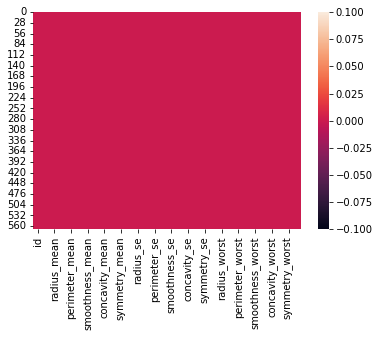

In [11]:
plt.figure()
sns.heatmap(mydata.isnull())

In [12]:
x=mydata.drop("diagnosis", axis=1)
y=mydata["diagnosis"]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

In [14]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [16]:
predictions=model.predict(x_test)
accuracy_score(y_test, predictions)

0.6666666666666666

In [17]:
dTree = DecisionTreeClassifier(criterion='gini', random_state=0)
dTree.fit(x_train, y_train)
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

1.0
0.9473684210526315


In [19]:
clf = svm.SVC(gamma=0.05, C=3)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.6666666666666666

In [20]:
bgcl = BaggingClassifier(n_estimators=50, base_estimator=dTree, random_state=0)
bgcl = bgcl.fit(x_train, y_train)
y_predict = bgcl.predict(x_test)
print(bgcl.score(x_test, y_test)) ## Best result

0.9649122807017544


In [21]:
abcl = AdaBoostClassifier(n_estimators=100, random_state=0)
abcl = abcl.fit(x_train, y_train)
y_predict = abcl.predict(x_test)
print(abcl.score(x_test, y_test))

0.9590643274853801


In [22]:
gbcl = GradientBoostingClassifier(n_estimators=50, random_state=0)
gbcl = gbcl.fit(x_train, y_train)
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))

0.9415204678362573


In [23]:
rfcl = RandomForestClassifier(n_estimators=50, random_state=0, max_features=3)
rfcl = rfcl.fit(x_train, y_train)
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))

0.9590643274853801
